## Yasaman Shojaei Project

### Part 2. Customer Group (Clustering)

#### step 1. prepare dataset

In [1]:
import pandas as pd
from pathlib import Path


In [2]:
data_path = Path("raw_dataset") / "Customers.csv"
df = pd.read_csv(data_path)
df.columns = [header.lower().replace(" ", "_") for header in df.columns]
df.head(10)


,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.isna().sum()


customerid                0
gender                    0
age                       0
annual_income_(k$)        0
spending_score_(1-100)    0
dtype: int64

In [4]:
df_copy = df.copy()
df_copy["gender"] = df["gender"].map({"Male": 1, "Female": 0})
df_copy.head(10)



,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


#### step 2. data insight

In [5]:
df_copy.describe()


,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


#### step 3. select and standardize features

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np


In [13]:
df_customers = df_copy.drop('customerid', axis=1)

In [14]:
scaler = StandardScaler()
scaler.fit(df_customers)
X = scaler.transform(df_customers)
type(X)


numpy.ndarray

#### step 4. implement k-means

In [15]:
from sklearn.cluster import KMeans


In [16]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=28).fit(X)
y_pred = kmeans.predict(X)
df_customers["cluster"] = y_pred

In [17]:
df_customers.head(5)

,gender,age,annual_income_(k$),spending_score_(1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


#### step 5. mean of each variable for each cluster

In [18]:
df_customers.groupby('cluster').mean()

,gender,age,annual_income_(k$),spending_score_(1-100)
cluster,,,,
0,0.339286,25.910714,37.803571,58.714286
1,0.477612,54.582090,50.716418,39.298507
2,0.480519,34.571429,85.675325,53.493506


Age mean for cluster 0 is about 25 years and and annual income mean is about 37 thousand dollars.  
Age mean for cluster 1 is about 54 years and and annual income mean is about 50 thousand dollars.  
Age mean for cluster 2 is about 34 years and and annual income mean is about 85 thousand dollars.

#### step 6. visualization

#### step 5. tune k

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


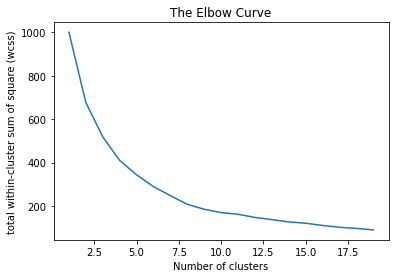

In [24]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("total within-cluster sum of square (wcss)")
plt.show()


from the above figure and the rule of elbow, it can be seen that best k is about 10.